# Analyse von COVID-19-Papieren

In dieser Aufgabe setzen wir uns weiterhin mit dem Thema der COVID-Pandemie auseinander und konzentrieren uns auf die Verarbeitung wissenschaftlicher Arbeiten zu diesem Thema. Es gibt das [CORD-19-Dataset](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) mit mehr als 7000 (zum Zeitpunkt der Erstellung) wissenschaftlichen Arbeiten zu COVID, das zusammen mit Metadaten und Abstracts verfügbar ist (und für etwa die Hälfte davon ist auch der vollständige Text verfügbar).

Ein vollständiges Beispiel für die Analyse dieses Datensatzes mithilfe des kognitiven Dienstes [Text Analytics for Health](https://docs.microsoft.com/azure/cognitive-services/text-analytics/how-tos/text-analytics-for-health/?WT.mc_id=academic-77958-bethanycheum) wird [in diesem Blogbeitrag](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) beschrieben. Wir werden eine vereinfachte Version dieser Analyse besprechen.


In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Abrufen der Daten

Zunächst müssen wir die Metadaten der CORD-Papers abrufen, mit denen wir arbeiten werden.

**HINWEIS**: Wir stellen keine Kopie des Datensatzes als Teil dieses Repositorys bereit. Sie müssen möglicherweise zuerst die Datei [`metadata.csv`](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge?select=metadata.csv) von [diesem Datensatz auf Kaggle](https://www.kaggle.com/allen-institute-for-ai/CORD-19-research-challenge) herunterladen. Eine Registrierung bei Kaggle könnte erforderlich sein. Alternativ können Sie den Datensatz ohne Registrierung [hier herunterladen](https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/historical_releases.html), wobei dieser alle Volltexte zusätzlich zur Metadaten-Datei enthält.

Wir werden versuchen, die Daten direkt aus der Online-Quelle abzurufen. Falls dies jedoch fehlschlägt, müssen Sie die Daten wie oben beschrieben herunterladen. Es ist auch sinnvoll, die Daten herunterzuladen, wenn Sie vorhaben, weiter damit zu experimentieren, um Wartezeiten zu vermeiden.

> **HINWEIS**: Der Datensatz ist ziemlich groß, etwa 1 GB, und die folgende Codezeile kann eine lange Zeit in Anspruch nehmen! (~5 Minuten)


In [146]:
df = pd.read_csv("https://datascience4beginners.blob.core.windows.net/cord/metadata.csv.zip",compression='zip')
# df = pd.read_csv("metadata.csv")
df.head()

C:\winapp\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (1,4,5,6,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.



cord_uid                                       sha source_x  \
0  ug7v899j  d1aafb70c066a2068b02786f8929fd9c900897fb      PMC   
1  02tnwd4m  6b0567729c2143a66d737eb0a2f63f2dce2e5a7d      PMC   
2  ejv2xln0  06ced00a5fc04215949aa72528f2eeaae1d58927      PMC   
3  2b73a28n  348055649b6b8cf2b9a376498df9bf41f7123605      PMC   
4  9785vg6d  5f48792a5fa08bed9f56016f4981ae2ca6031b32      PMC   

                                               title                    doi  \
0  Clinical features of culture-proven Mycoplasma...  10.1186/1471-2334-1-6   
1  Nitric oxide: a pro-inflammatory mediator in l...           10.1186/rr14   
2    Surfactant protein-D and pulmonary host defense           10.1186/rr19   
3               Role of endothelin-1 in lung disease           10.1186/rr44   
4  Gene expression in epithelial cells in respons...           10.1186/rr61   

      pmcid pubmed_id license  \
0  PMC35282  11472636   no-cc   
1  PMC59543  11667967   no-cc   
2  PMC59549  11667972   no-cc   
3  PMC59574  11686871   no-cc   
4  PMC59580  11686888   no-cc   

                                            abstract publish_time  \
0  OBJECTIVE: This retrospective chart review des...   2001-07-04   
1  Inflammatory diseases of the respiratory tract...   2000-08-15   
2  Surfactant protein-D (SP-D) participates in th...   2000-08-25   
3  Endothelin-1 (ET-1) is a 21 amino acid peptide...   2001-02-22   
4  Respiratory syncytial virus (RSV) and pneumoni...   2001-05-11   

                                             authors         journal  mag_id  \
0                Madani, Tariq A; Al-Ghamdi, Aisha A  BMC Infect Dis     NaN   
1  Vliet, Albert van der; Eiserich, Jason P; Cros...      Respir Res     NaN   
2                                    Crouch, Erika C      Respir Res     NaN   
3  Fagan, Karen A; McMurtry, Ivan F; Rodman, David M      Respir Res     NaN   
4  Domachowske, Joseph B; Bonville, Cynthia A; Ro...      Respir Res     NaN   

  who_covidence_id arxiv_id  \
0              NaN      NaN   
1              NaN      NaN   
2              NaN      NaN   
3              NaN      NaN   
4              NaN      NaN   

                                      pdf_json_files  \
0  document_parses/pdf_json/d1aafb70c066a2068b027...   
1  document_parses/pdf_json/6b0567729c2143a66d737...   
2  document_parses/pdf_json/06ced00a5fc04215949aa...   
3  document_parses/pdf_json/348055649b6b8cf2b9a37...   
4  document_parses/pdf_json/5f48792a5fa08bed9f560...   

                               pmc_json_files  \
0  document_parses/pmc_json/PMC35282.xml.json   
1  document_parses/pmc_json/PMC59543.xml.json   
2  document_parses/pmc_json/PMC59549.xml.json   
3  document_parses/pmc_json/PMC59574.xml.json   
4  document_parses/pmc_json/PMC59580.xml.json   

                                                 url  s2_id  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...    NaN  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...    NaN

Wir werden nun die Spalte mit dem Veröffentlichungsdatum in `datetime` umwandeln und das Histogramm plotten, um den Bereich der Veröffentlichungsdaten zu sehen.


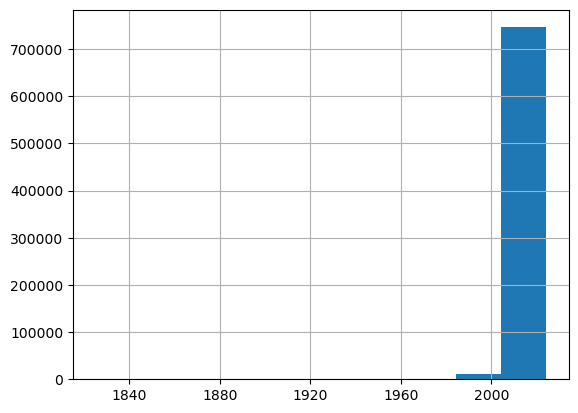

In [147]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'].hist()
plt.show()

## Extraktion strukturierter Daten

Schauen wir, welche Informationen wir leicht aus Abstracts extrahieren können. Eine Sache, die uns interessieren könnte, ist, welche Behandlungsstrategien existieren und wie sie sich im Laufe der Zeit entwickelt haben. Zunächst können wir manuell eine Liste möglicher Medikamente zusammenstellen, die zur Behandlung von COVID verwendet werden, sowie eine Liste von Diagnosen. Anschließend gehen wir diese durch und suchen nach entsprechenden Begriffen in den Abstracts von wissenschaftlichen Arbeiten.


In [148]:
medications = [
    'hydroxychloroquine', 'chloroquine', 'tocilizumab', 'remdesivir', 'azithromycin', 
    'lopinavir', 'ritonavir', 'dexamethasone', 'heparin', 'favipiravir', 'methylprednisolone']
diagnosis = [
    'covid','sars','pneumonia','infection','diabetes','coronavirus','death'
]

for m in medications:
    print(f" + Processing medication: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))
    
for m in diagnosis:
    print(f" + Processing diagnosis: {m}")
    df[m] = df['abstract'].apply(lambda x: str(x).lower().count(' '+m))

 + Processing medication: hydroxychloroquine
 + Processing medication: chloroquine
 + Processing medication: tocilizumab
 + Processing medication: remdesivir
 + Processing medication: azithromycin
 + Processing medication: lopinavir
 + Processing medication: ritonavir
 + Processing medication: dexamethasone
 + Processing medication: heparin
 + Processing medication: favipiravir
 + Processing medication: methylprednisolone
 + Processing diagnosis: covid
 + Processing diagnosis: sars
 + Processing diagnosis: pneumonia
 + Processing diagnosis: infection
 + Processing diagnosis: diabetes
 + Processing diagnosis: coronavirus
 + Processing diagnosis: death


Wir haben unserem Dataframe mehrere Spalten hinzugefügt, die die Anzahl der Vorkommen eines bestimmten Medikaments/Diagnose in der Zusammenfassung enthalten.

> **Hinweis**: Wir fügen am Anfang des Wortes ein Leerzeichen hinzu, wenn wir nach einem Teilstring suchen. Wenn wir das nicht tun, könnten wir falsche Ergebnisse erhalten, da *Chloroquin* auch im Teilstring *Hydroxychloroquin* gefunden werden könnte. Außerdem erzwingen wir die Umwandlung der Spalte "abstracts" in `str`, um einen Fehler zu vermeiden – versuchen Sie, `str` zu entfernen, und sehen Sie, was passiert.

Um die Arbeit mit den Daten zu erleichtern, können wir den Teilrahmen mit nur den Medikamentenzählungen extrahieren und die kumulierte Anzahl der Vorkommen berechnen. Dies zeigt uns das beliebteste Medikament:


In [149]:
dfm = df[medications]
dfm = dfm.sum().reset_index().rename(columns={ 'index' : 'Name', 0 : 'Count'})
dfm.sort_values('Count',ascending=False)

Name  Count
0   hydroxychloroquine   9806
3           remdesivir   7861
2          tocilizumab   6118
1          chloroquine   4578
8              heparin   4161
5            lopinavir   3811
4         azithromycin   3585
7        dexamethasone   3340
9          favipiravir   2439
10  methylprednisolone   1600
6            ritonavir    948

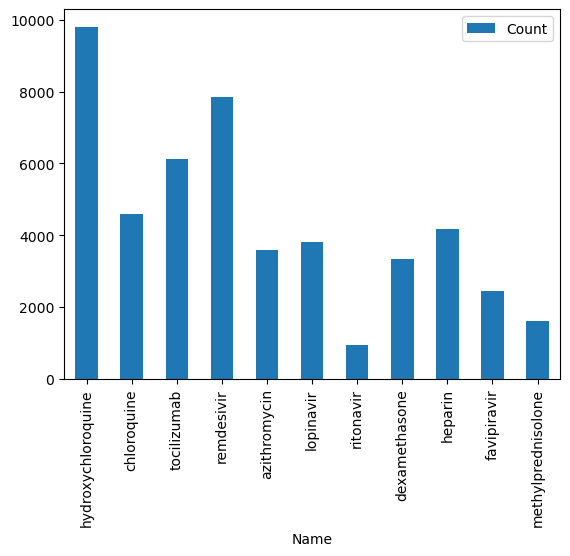

In [150]:
dfm.set_index('Name').plot(kind='bar')
plt.show()

## Trends in der Behandlungsstrategie erkennen

Im obigen Beispiel haben wir alle Werte `sum`iert, aber wir können dies auch auf monatlicher Basis tun:


In [151]:
dfm = df[['publish_time']+medications].set_index('publish_time')
dfm = dfm[(dfm.index>="2020-01-01") & (dfm.index<="2021-07-31")]
dfmt = dfm.groupby([dfm.index.year,dfm.index.month]).sum()
dfmt

hydroxychloroquine  chloroquine  tocilizumab  \
publish_time publish_time                                                 
2020         1                           3672         1773         1779   
             2                              0           19            0   
             3                             45           72            5   
             4                            188          238           50   
             5                            459          191          158   
             6                            381          149          243   
             7                            381          178          202   
             8                            307          115          172   
             9                            319          123          185   
             10                           319           96          212   
             11                           272           66          170   
             12                           255          102          229   
2021         1                           2191          780         1787   
             2                            163           66          184   
             3                            172           85          190   
             4                            198           70          125   
             5                            141           55          138   
             6                            144           29          138   
             7                            112           49           96   

                           remdesivir  azithromycin  lopinavir  ritonavir  \
publish_time publish_time                                                   
2020         1                   2134          1173       1430        370   
             2                      3             3         18         11   
             3                     27            12         52         16   
             4                    124            68        113         13   
             5                    209           132        135         41   
             6                    186           110        132         18   
             7                    165           108        138         29   
             8                    165           145         91         24   
             9                    190            91         98         28   
             10                   227            72        127         39   
             11                   197            79        104         27   
             12                   271            98         76         31   
2021         1                   2523           892        841        198   
             2                    173            85         76          9   
             3                    295            87        100         17   
             4                    161            83         60         13   
             5                    179            69         55         21   
             6                    182            75         41         12   
             7                    270            64         59          5   

                           dexamethasone  heparin  favipiravir  \
publish_time publish_time                                        
2020         1                       561      984          666   
             2                         1        3           12   
             3                         3       21           11   
             4                        14       77           48   
             5                        12       92           48   
             6                        48       84           30   
             7                        58      117           56   
             8                        56       95           45   
             9                        90      111           46   
             10                       97      117           81   
             11                       77 

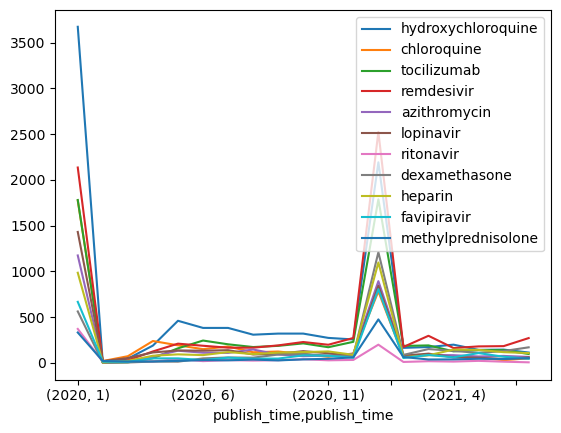

In [152]:
dfmt.plot()
plt.show()

Eine interessante Beobachtung ist, dass wir große Ausschläge an zwei Stellen haben: Januar 2020 und Januar 2021. Dies liegt daran, dass einige Artikel kein klar angegebenes Veröffentlichungsdatum haben und stattdessen als Januar des jeweiligen Jahres angegeben werden.

Um die Daten besser zu verstehen, lassen Sie uns nur einige wenige Medikamente visualisieren. Wir werden außerdem die Daten für Januar "löschen" und durch einen mittleren Wert ersetzen, um eine ansprechendere Grafik zu erstellen:


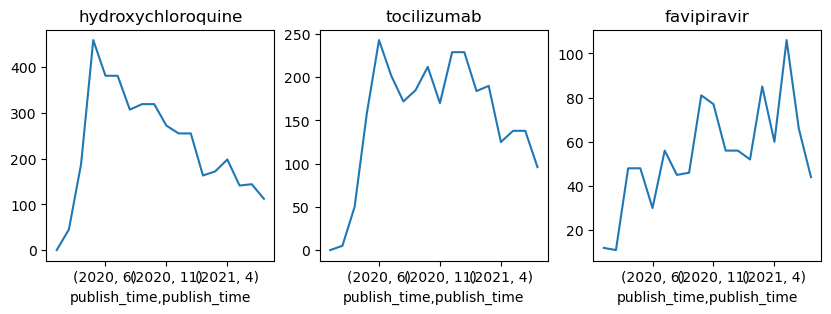

In [153]:
meds = ['hydroxychloroquine','tocilizumab','favipiravir']
dfmt.loc[(2020,1)] = np.nan
dfmt.loc[(2021,1)] = np.nan
dfmt.fillna(method='pad',inplace=True)
fig, ax = plt.subplots(1,len(meds),figsize=(10,3))
for i,m in enumerate(meds):
    dfmt[m].plot(ax=ax[i])
    ax[i].set_title(m)
plt.show()

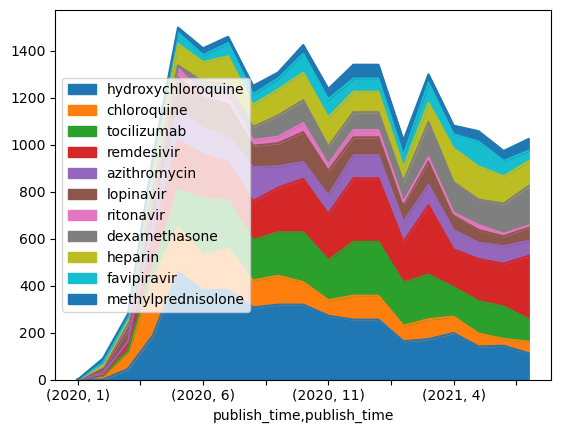

In [154]:
dfmt.plot.area()
plt.show()

Noch weiter können wir die relative Beliebtheit in Prozent berechnen:


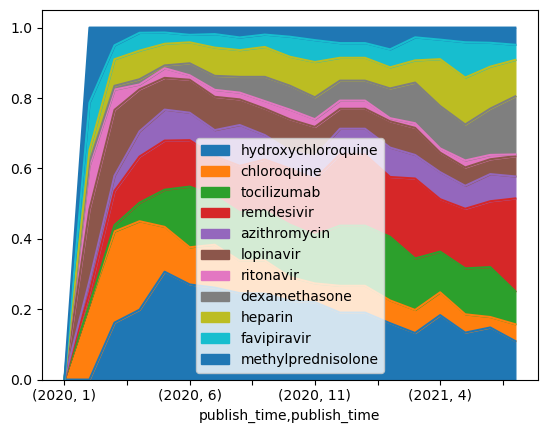

In [155]:
dfmtp = dfmt.iloc[:,:].apply(lambda x: x/x.sum(), axis=1)
dfmtp.plot.area()
plt.show()

## Berechnung der Zuordnung zwischen Medizin und Diagnose

Eine der interessantesten Beziehungen, die wir untersuchen können, ist, wie verschiedene Diagnosen mit unterschiedlichen Medikamenten behandelt werden. Um dies zu visualisieren, müssen wir eine **Ko-Okkurrenz-Häufigkeitskarte** berechnen, die zeigt, wie oft zwei Begriffe im selben Artikel erwähnt werden.

Eine solche Karte ist im Wesentlichen eine 2D-Matrix, die am besten durch ein **numpy array** dargestellt wird. Wir werden diese Karte berechnen, indem wir alle Abstracts durchgehen und die dort vorkommenden Entitäten markieren:


In [156]:
m = np.zeros((len(medications),len(diagnosis)))
for a in df['abstract']:
    x = str(a).lower()
    for i,d in enumerate(diagnosis):
        if ' '+d in x:
            for j,me in enumerate(medications):
                if ' '+me in x:
                    m[j,i] += 1

In [157]:
m

array([[4788., 2264.,  741., 2109.,  348., 2730.,  975.],
       [2111., 1238.,  231.,  998.,   79., 1394.,  364.],
       [2186.,  821.,  691., 1063.,  185., 1136.,  573.],
       [3210., 2191.,  522., 1538.,  160., 2191.,  622.],
       [1803.,  773.,  406.,  880.,  133.,  909.,  410.],
       [1982., 1102.,  379.,  885.,  113., 1366.,  370.],
       [ 504.,  356.,   83.,  259.,   23.,  354.,  106.],
       [1419.,  640.,  345.,  742.,  108.,  760.,  314.],
       [1537.,  678.,  330.,  782.,   93.,  826.,  301.],
       [ 967.,  634.,  201.,  431.,   44.,  656.,  136.],
       [ 660.,  336.,  293.,  385.,   53.,  452.,  148.]])

Eine der Möglichkeiten, diese Matrix zu visualisieren, besteht darin, eine **Heatmap** zu zeichnen:


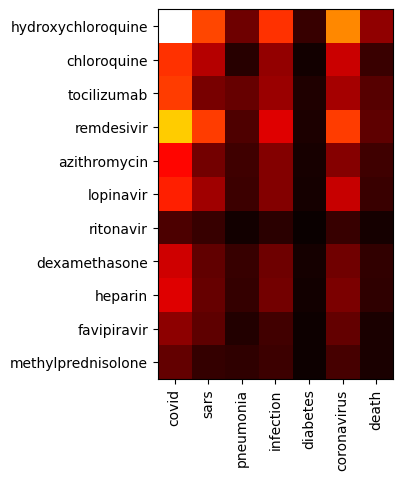

In [158]:
plt.imshow(m,interpolation='nearest',cmap='hot')
ax = plt.gca()
ax.set_yticks(range(len(medications))) 
ax.set_yticklabels(medications)
ax.set_xticks(range(len(diagnosis)))
ax.set_xticklabels(diagnosis,rotation=90)
plt.show()

Eine noch bessere Visualisierung kann mit einem sogenannten **Sankey-Diagramm** erreicht werden! `matplotlib` bietet keine eingebaute Unterstützung für diesen Diagrammtyp, daher müssen wir [Plotly](https://plotly.com/python/) verwenden, wie in [diesem Tutorial](https://plotly.com/python/sankey-diagram/) beschrieben.

Um ein Sankey-Diagramm mit Plotly zu erstellen, müssen wir die folgenden Listen aufbauen:
* Liste `all_nodes` mit allen Knoten im Diagramm, die sowohl Medikamente als auch Diagnosen umfasst
* Liste der Quell- und Zielindizes – diese Listen zeigen, welche Knoten auf die linke und welche auf die rechte Seite des Diagramms gehen
* Liste aller Verbindungen, wobei jede Verbindung besteht aus:
   - Quellindex im `all_nodes` Array
   - Zielindex
   - Wert, der die Stärke der Verbindung angibt. Dies ist genau der Wert aus unserer Ko-Okkurrenz-Matrix.
   - Optional die Farbe der Verbindung. Wir werden eine Option hinzufügen, um einige Begriffe zur besseren Übersicht hervorzuheben.

Der generische Code zum Zeichnen eines Sankey-Diagramms ist als separate `sankey` Funktion strukturiert, die zwei Listen (Quell- und Zielkategorien) und die Ko-Okkurrenz-Matrix entgegennimmt. Sie ermöglicht es uns auch, einen Schwellenwert festzulegen und alle Verbindungen auszuschließen, die schwächer als dieser Schwellenwert sind – das macht das Diagramm etwas weniger komplex.


In [160]:
import plotly.graph_objects as go

def sankey(cat1, cat2, m, treshold=0, h1=[], h2=[]):
    all_nodes = cat1 + cat2
    source_indices = list(range(len(cat1)))
    target_indices = list(range(len(cat1),len(cat1)+len(cat2)))

    s, t, v, c = [], [], [], []
    for i in range(len(cat1)):
        for j in range(len(cat2)):
            if m[i,j]>treshold:
                s.append(i)
                t.append(len(cat1)+j)
                v.append(m[i,j])
                c.append('pink' if i in h1 or j in h2 else 'lightgray')

    fig = go.Figure(data=[go.Sankey(
        # Define nodes
        node = dict(
        pad = 40,
        thickness = 40,
        line = dict(color = "black", width = 1.0),
        label =  all_nodes),

        # Add links
        link = dict(
        source =  s,
        target =  t,
        value =  v,
        color = c
    ))])
    fig.show()

sankey(medications,diagnosis,m,500,h2=[0])

## Fazit

Sie haben gesehen, dass wir mit recht einfachen Methoden Informationen aus unstrukturierten Datenquellen wie Text extrahieren können. In diesem Beispiel haben wir die vorhandene Liste von Medikamenten verwendet, aber es wäre viel leistungsfähiger, Techniken der natürlichen Sprachverarbeitung (NLP) einzusetzen, um Entitäten aus Text zu extrahieren. In [diesem Blogbeitrag](https://soshnikov.com/science/analyzing-medical-papers-with-azure-and-text-analytics-for-health/) beschreiben wir, wie Cloud-Dienste für die Entitätsextraktion genutzt werden können. Eine weitere Möglichkeit wäre die Verwendung von Python-NLP-Bibliotheken wie [NLTK](https://www.nltk.org/) – ein Ansatz zur Informationsgewinnung aus Text mit NLTK wird [hier](https://www.nltk.org/book/ch07.html) beschrieben.


## Herausforderung

Fahren Sie mit der Untersuchung der COVID-Paper-Daten entlang der folgenden Linien fort:

1. Erstellen Sie eine Ko-Okkurrenz-Matrix für verschiedene Medikamente und analysieren Sie, welche Medikamente häufig zusammen auftreten (d.h. in einem Abstract erwähnt werden). Sie können den Code zur Erstellung der Ko-Okkurrenz-Matrix für Medikamente und Diagnosen anpassen.
1. Visualisieren Sie diese Matrix mithilfe eines Heatmaps.
1. Als zusätzliche Herausforderung könnten Sie die Ko-Okkurrenz von Medikamenten mit einem [Chord-Diagramm](https://en.wikipedia.org/wiki/Chord_diagram) visualisieren. [Diese Bibliothek](https://pypi.org/project/chord/) könnte Ihnen helfen, ein Chord-Diagramm zu erstellen.
1. Als weitere Herausforderung versuchen Sie, die Dosierungen verschiedener Medikamente (wie **400mg** in *nehmen Sie täglich 400mg Chloroquin*) mithilfe von regulären Ausdrücken zu extrahieren und ein Dataframe zu erstellen, das die verschiedenen Dosierungen für unterschiedliche Medikamente zeigt. **Hinweis**: Berücksichtigen Sie numerische Werte, die sich in unmittelbarer textlicher Nähe zum Medikamentennamen befinden.



---

**Haftungsausschluss**:  
Dieses Dokument wurde mit dem KI-Übersetzungsdienst [Co-op Translator](https://github.com/Azure/co-op-translator) übersetzt. Obwohl wir uns um Genauigkeit bemühen, beachten Sie bitte, dass automatisierte Übersetzungen Fehler oder Ungenauigkeiten enthalten können. Das Originaldokument in seiner ursprünglichen Sprache sollte als maßgebliche Quelle betrachtet werden. Für kritische Informationen wird eine professionelle menschliche Übersetzung empfohlen. Wir übernehmen keine Haftung für Missverständnisse oder Fehlinterpretationen, die sich aus der Nutzung dieser Übersetzung ergeben.
